# Assignment 3
Solve the 2D wave equation for eigenmodes and eigenfrequencies of membranes (square, rectangle, circle) with fixed boundaries. Discretize, compute eigenvalues, analyze frequency dependence on size, and visualize time evolution. Also, solve the steady-state diffusion equation on a circular domain.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from IPython.display import HTML

from src.config import *

----
## 3.1 Eigenmodus of drums or membranes of different shapes
Lorem ipsum odor amet, consectetuer adipiscing elit. Varius nullam vulputate lobortis porttitor in odio mus dictum. Tellus phasellus congue hac, tempus montes ullamcorper himenaeos. Arcu bibendum convallis lacus taciti rutrum ac dictumst mollis. Cras nullam est nostra netus nascetur iaculis hendrerit. Odio parturient purus maecenas consectetur porta hendrerit lobortis sodales. Maecenas quisque gravida sed nisi odio pellentesque habitasse. Cras tempus lacinia rhoncus conubia duis massa. Sem nibh dui mus consequat facilisi. Porta malesuada porttitor neque turpis molestie?

Consequat dictum curabitur integer suspendisse inceptos. Habitant mattis odio lorem nostra feugiat vitae vel habitasse. Scelerisque vehicula turpis eleifend, felis aptent venenatis ante fames. Tincidunt auctor quam ipsum velit ornare augue. Etiam habitant felis diam; ullamcorper netus aenean consectetur leo. Purus phasellus potenti tortor maecenas pulvinar. Auctor cras cursus hac tempor nam leo ad.

_by: Tycho Stam_

In [2]:
from src.grid_discretization import (
    initialize_grid_vector,
    initialize_tridiagonal_matrix,
)
from src.eigen_solver import (
    solve_eigenvalues,
    get_frequencies_list,
    time_dependent_solution,
    normalize_eigenmodus,
)
from script.create_plot import (
    create_seaborn_heatmap,
    plot_eigenmodus,
    plot_eigenfrequency,
    plot_eigenmode_animation,
    plot_multiple_eigenmodes
)

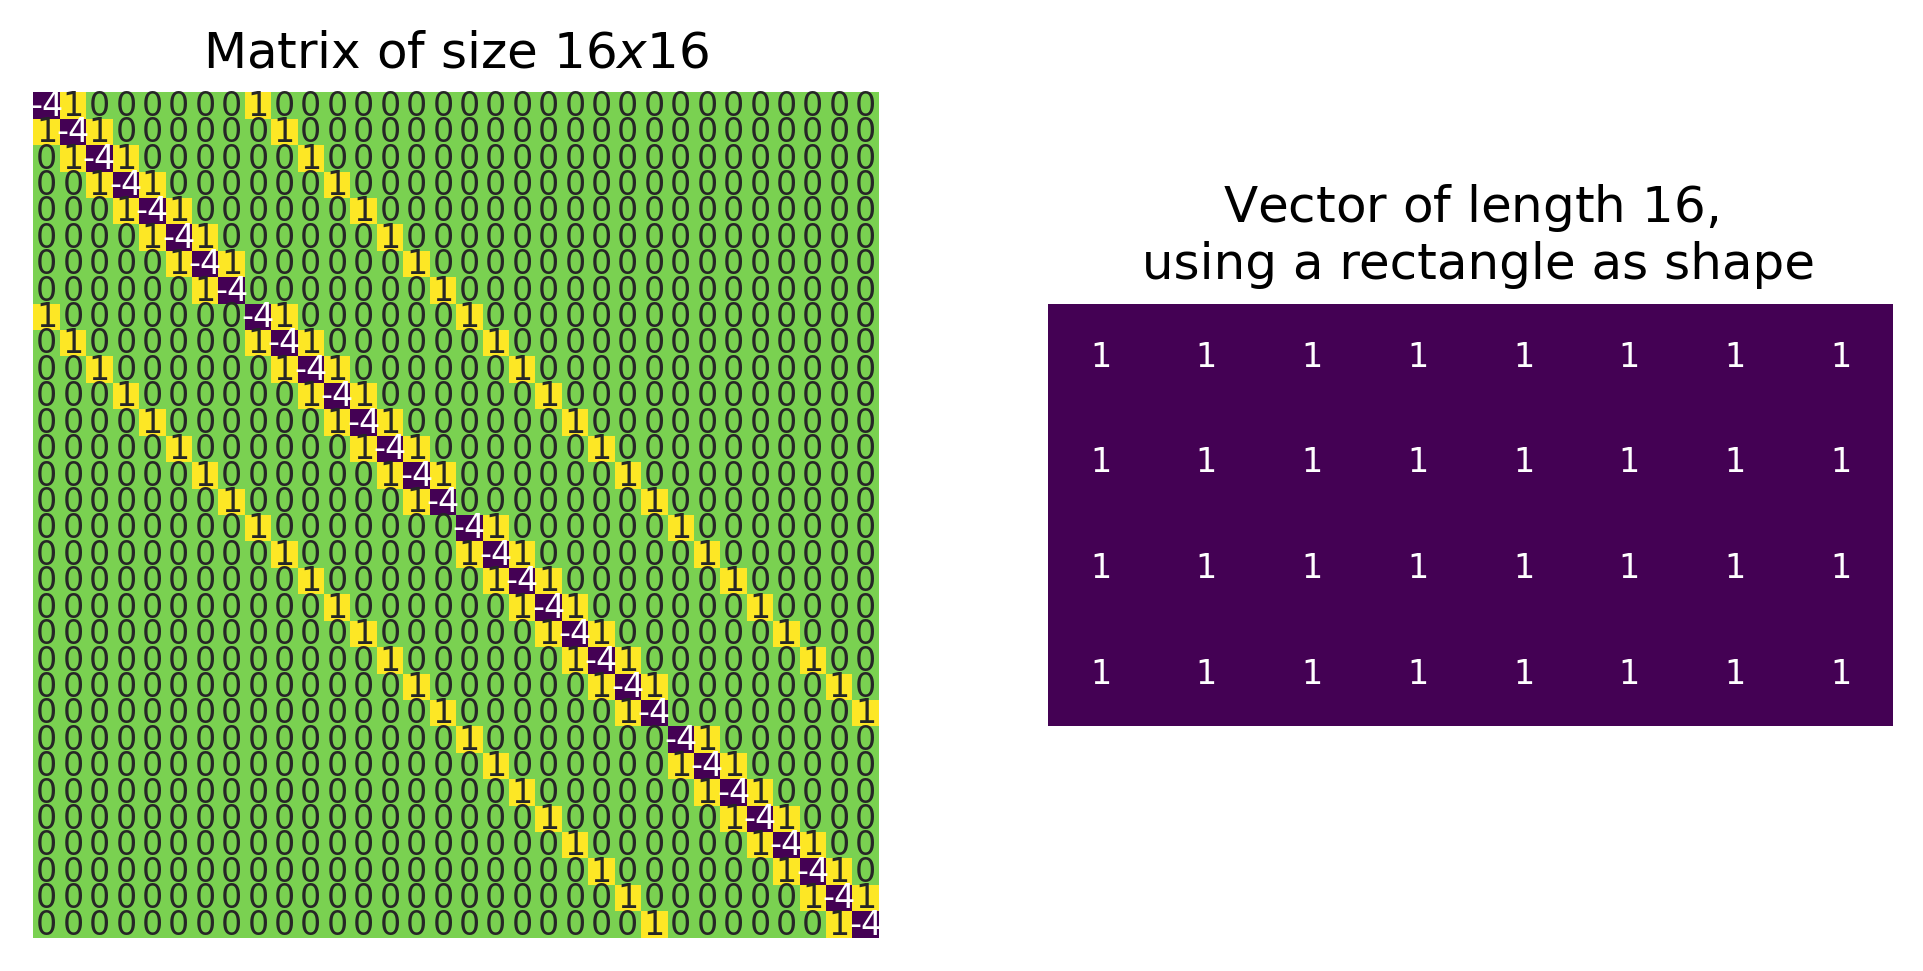

In [3]:
L = 4
shape = "rectangle"

v = initialize_grid_vector(L, shape=shape)
M = initialize_tridiagonal_matrix(v, L)

_, ax = plt.subplots(1, 2, figsize=(FIG_SIZE), dpi=FIG_DPI)

create_seaborn_heatmap(M.toarray(), ax[0])
ax[0].set_title(f"Matrix of size ${L**2} x {L**2}$")

create_seaborn_heatmap(v.reshape(L, L if not shape == "rectangle" else L * 2), ax[1])
ax[1].set_title(f"Vector of length ${L**2}$,\n using a {shape} as shape")

plt.show()

In [4]:
dx = 0.01
L = 50

v = initialize_grid_vector(L, shape=shape)

In [5]:
%%time
M = initialize_tridiagonal_matrix(vector=v, L=L, sparse=False)

M = M * dx**2
frequencies, eigenvectors = solve_eigenvalues(M, model="h")

Time taken to solve the eigenvalues: 22.96 seconds with matrix of size 5000, N=70
CPU times: user 1min 49s, sys: 1min 57s, total: 3min 46s
Wall time: 23.2 s


In [6]:
%%time
M = initialize_tridiagonal_matrix(vector=v, L=L, sparse=True)

M = M * dx**2
frequencies, eigenvectors = solve_eigenvalues(M, model="h")

Time taken to solve the eigenvalues: 0.17 seconds using sparse solver with matrix of size 5000, N=70
CPU times: user 551 ms, sys: 1.56 s, total: 2.11 s
Wall time: 321 ms


In [7]:
def plot_shape_modus(shape: str) -> None:
    """
    Plot the eigenmodes of a given shape.

    Params
    ----------
    - shape (str): The shape of the grid.
    """
    L = 55
    v = initialize_grid_vector(L, shape=shape)
    M = initialize_tridiagonal_matrix(v, L, sparse=True)
    M = M * dx**2

    frequencies, eigenvectors = solve_eigenvalues(M, num_eigen=5)
    frequencies[:PLOTS_AMOUNT], eigenvectors[:, :PLOTS_AMOUNT]

    plot_multiple_eigenmodes(PLOTS_AMOUNT, frequencies, eigenvectors, L, shape=shape)

Time taken to solve the eigenvalues: 0.11 seconds using sparse solver with matrix of size 3025, N=55


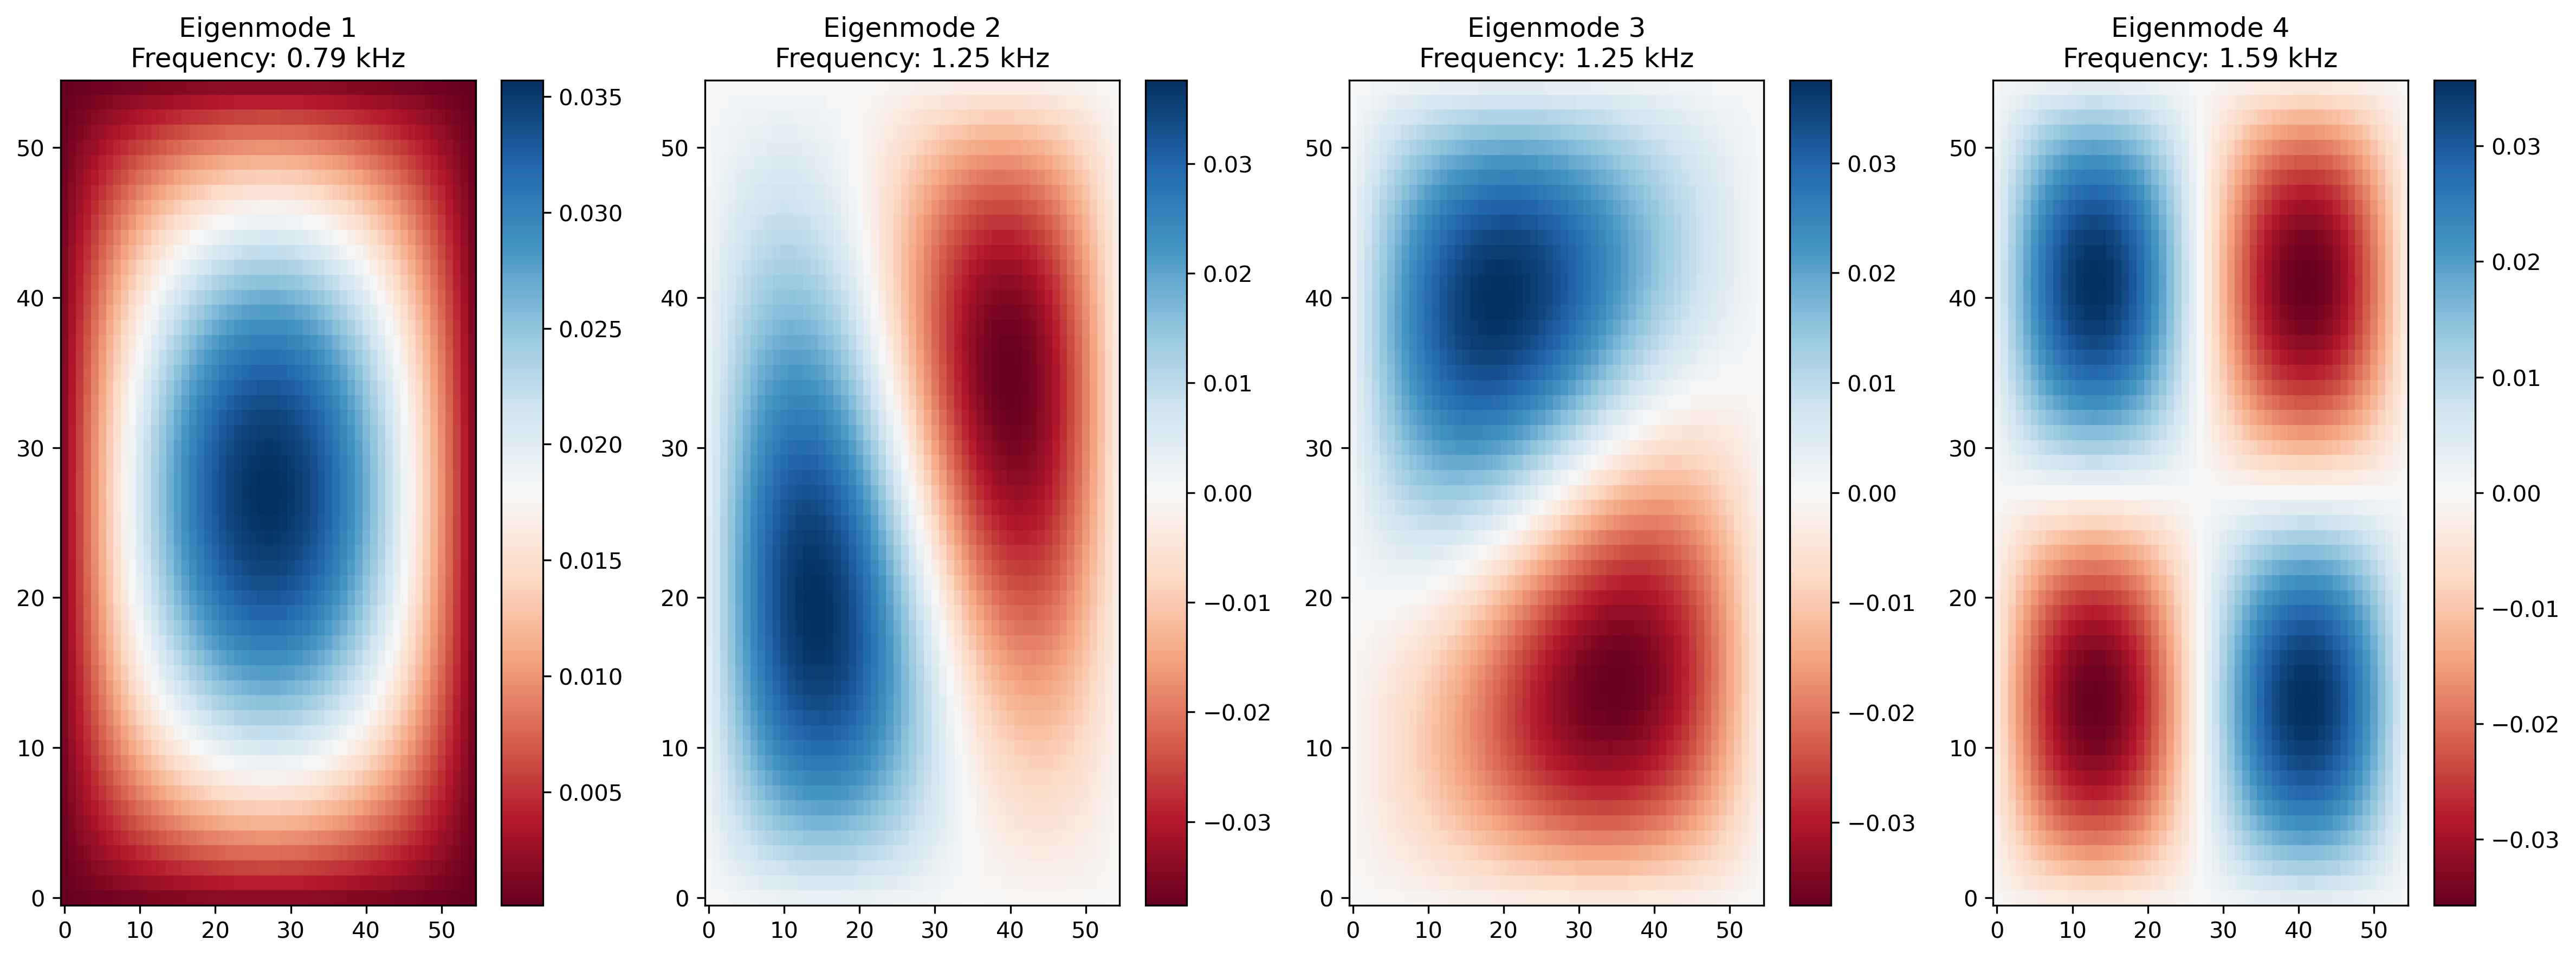

In [8]:
plot_shape_modus("square")

Time taken to solve the eigenvalues: 0.32 seconds using sparse solver with matrix of size 6050, N=77


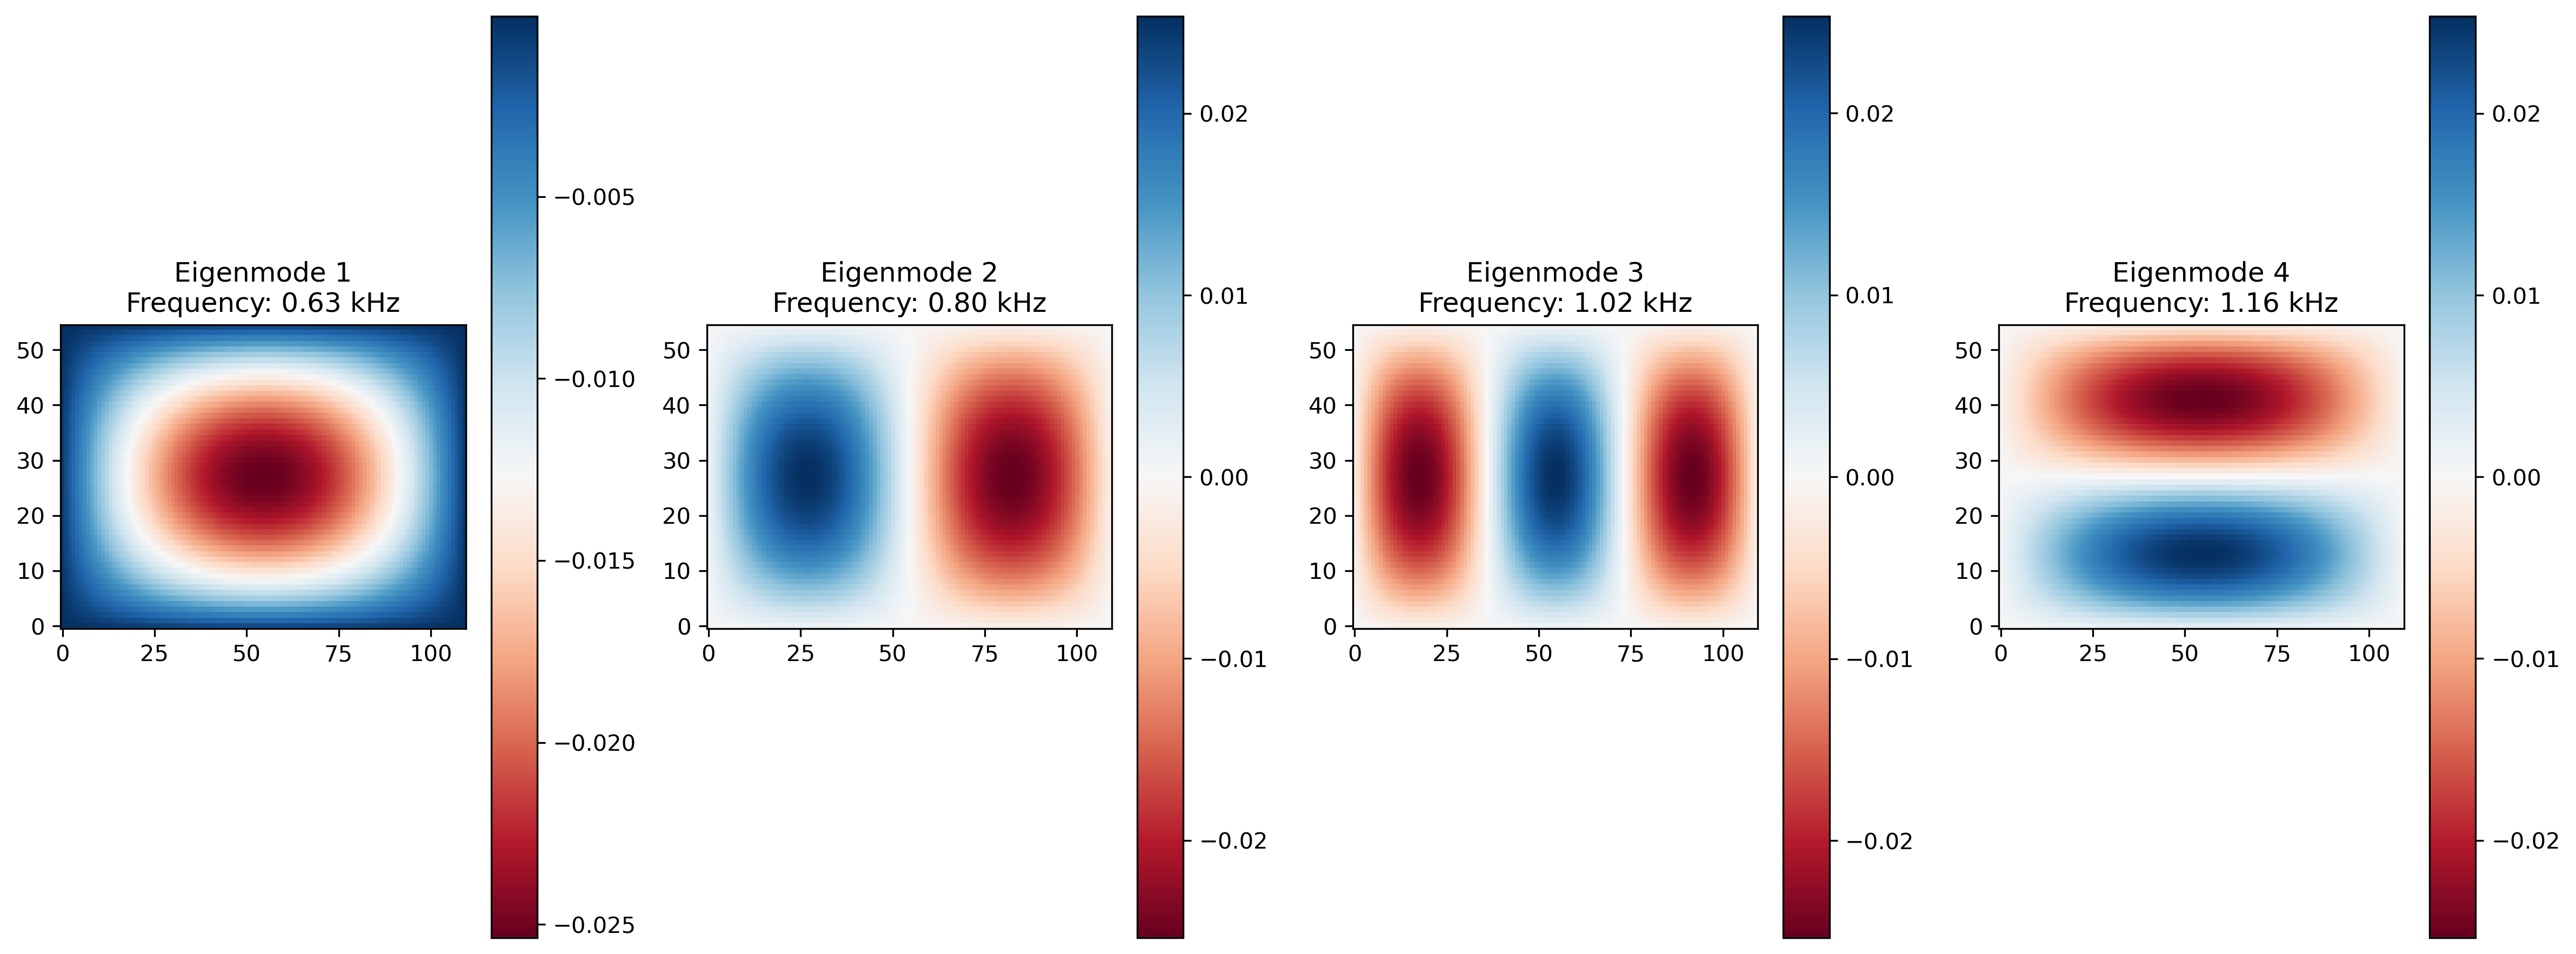

In [9]:
plot_shape_modus("rectangle")

Time taken to solve the eigenvalues: 0.29 seconds using sparse solver with matrix of size 3025, N=55


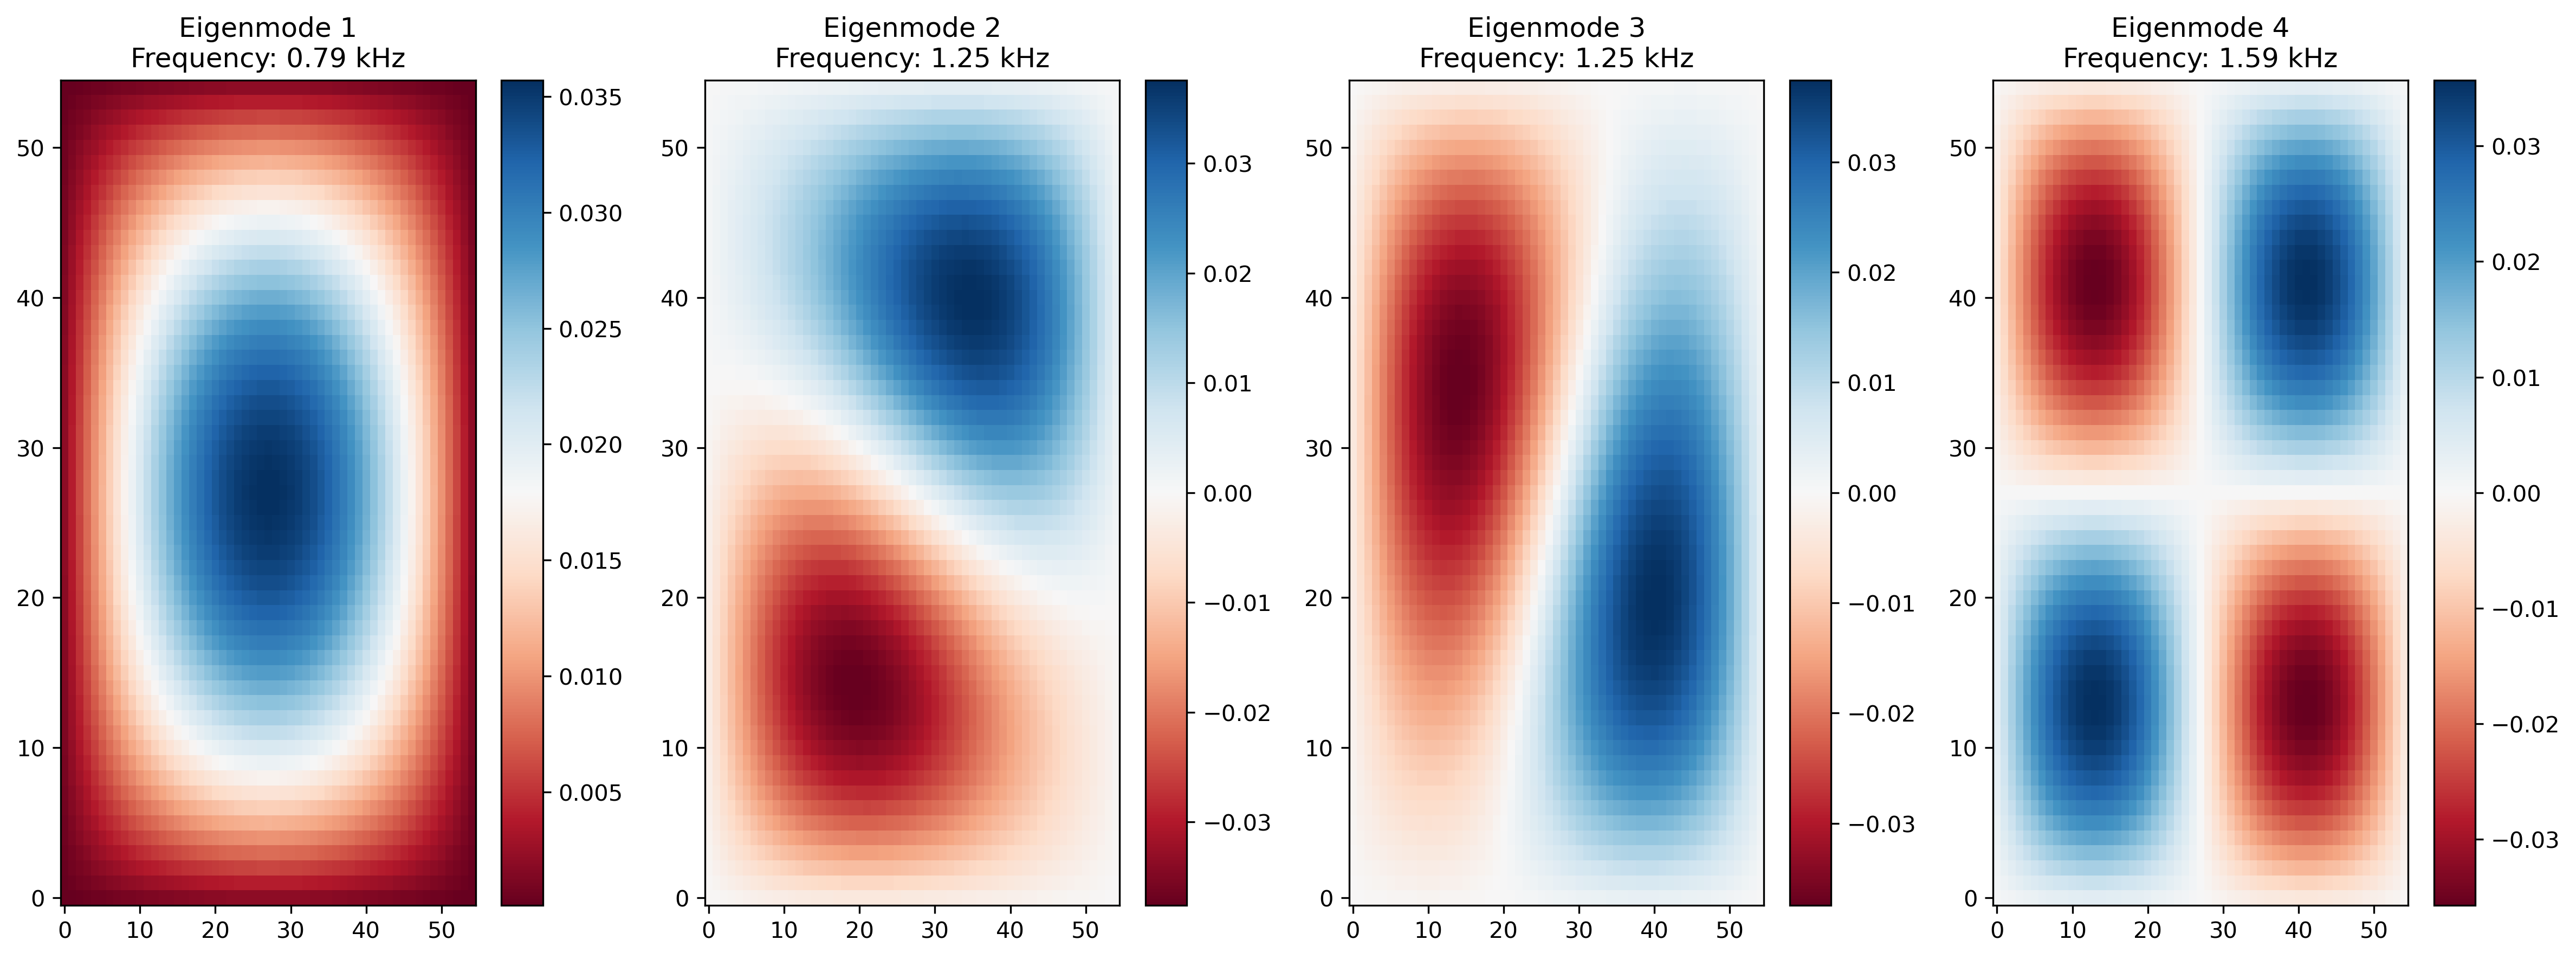

In [10]:
plot_shape_modus("circle")

In [11]:
def plot_shape_frequency(shape: str) -> None:
    """
    Plot the frequency of a given shape.

    Params
    ----------
    - shape (str): The shape of the grid.
    """
    L_list = np.linspace(1, L - 10, NUM_MODES, dtype=int)
    frequencies_list = get_frequencies_list(L, dx, L_list, shape)

    plot_eigenfrequency(L_list, frequencies_list, L, shape, save_img=False)

In [12]:
plot_shape_frequency("square")

TypeError: initialize_grid_vector() got multiple values for argument 'shape'

Time taken to solve the eigenvalues: 0.00 seconds using sparse solver with matrix of size 3025, N=55
Time taken to solve the eigenvalues: 0.02 seconds using sparse solver with matrix of size 3025, N=55
Time taken to solve the eigenvalues: 0.03 seconds using sparse solver with matrix of size 3025, N=55
Time taken to solve the eigenvalues: 0.01 seconds using sparse solver with matrix of size 3025, N=55
Time taken to solve the eigenvalues: 0.03 seconds using sparse solver with matrix of size 3025, N=55


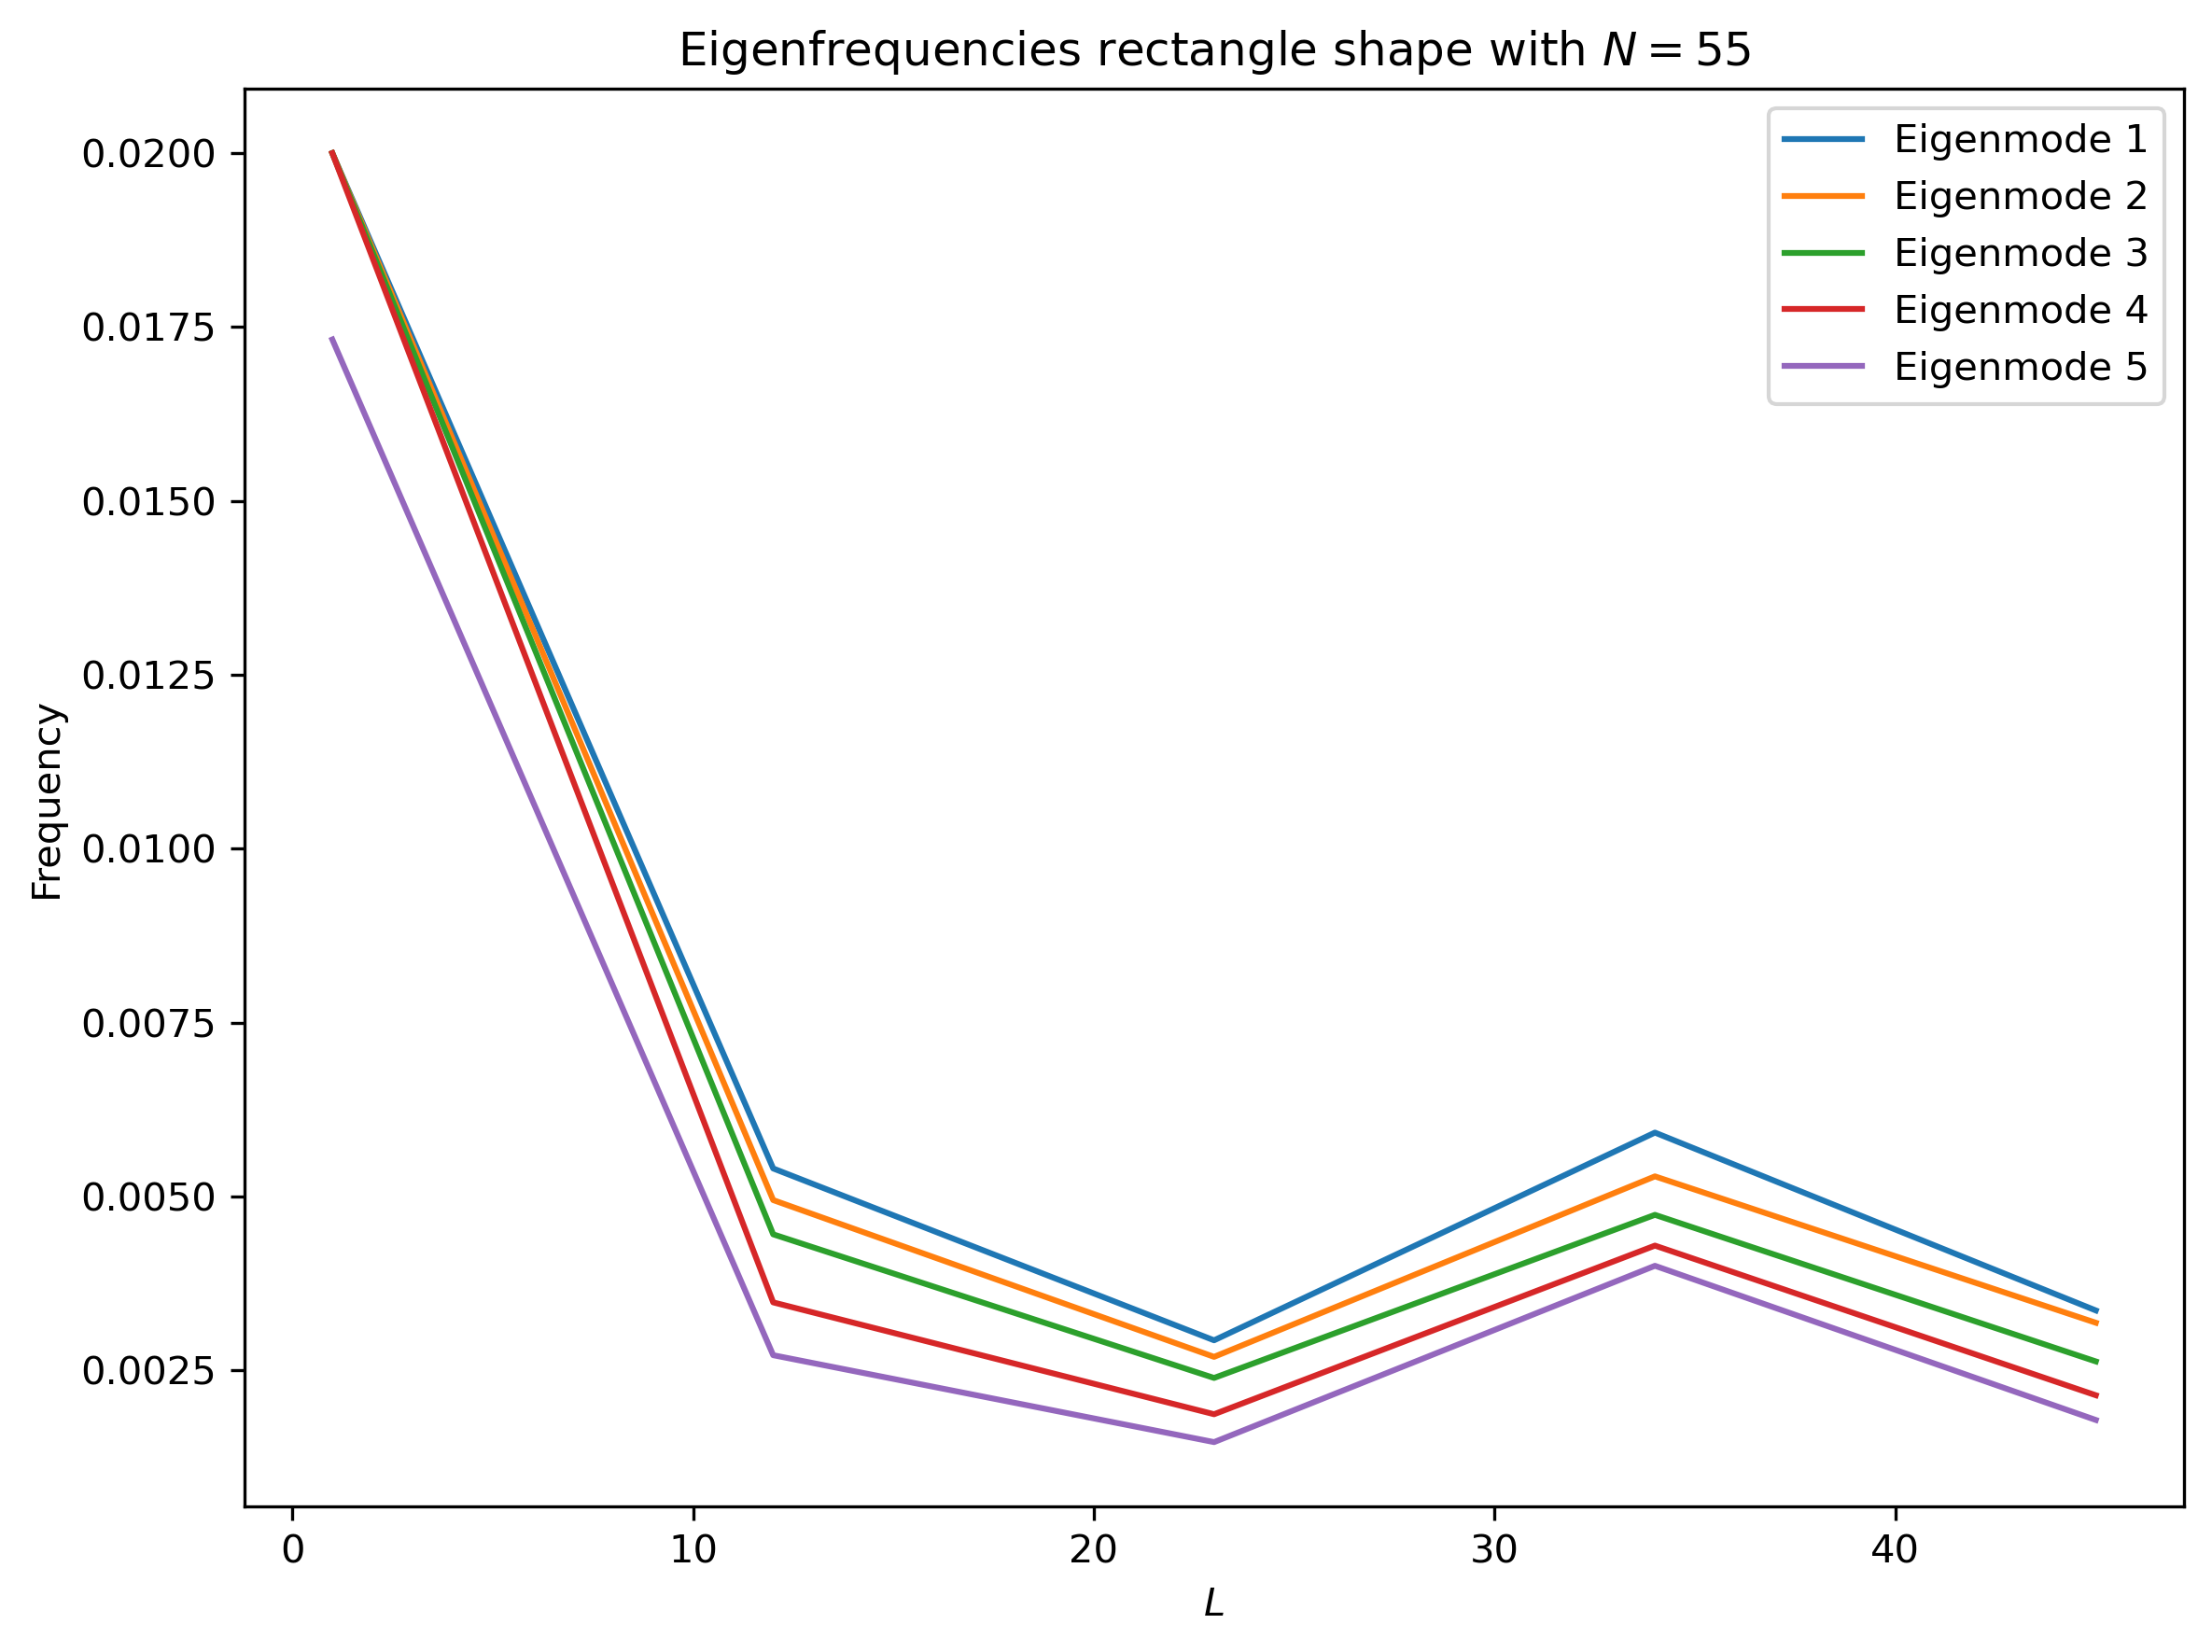

In [ ]:
plot_shape_frequency("rectangle")

Time taken to solve the eigenvalues: 0.00 seconds using sparse solver with matrix of size 3025, N=55
Time taken to solve the eigenvalues: 0.01 seconds using sparse solver with matrix of size 3025, N=55
Time taken to solve the eigenvalues: 0.01 seconds using sparse solver with matrix of size 3025, N=55
Time taken to solve the eigenvalues: 0.03 seconds using sparse solver with matrix of size 3025, N=55
Time taken to solve the eigenvalues: 0.03 seconds using sparse solver with matrix of size 3025, N=55


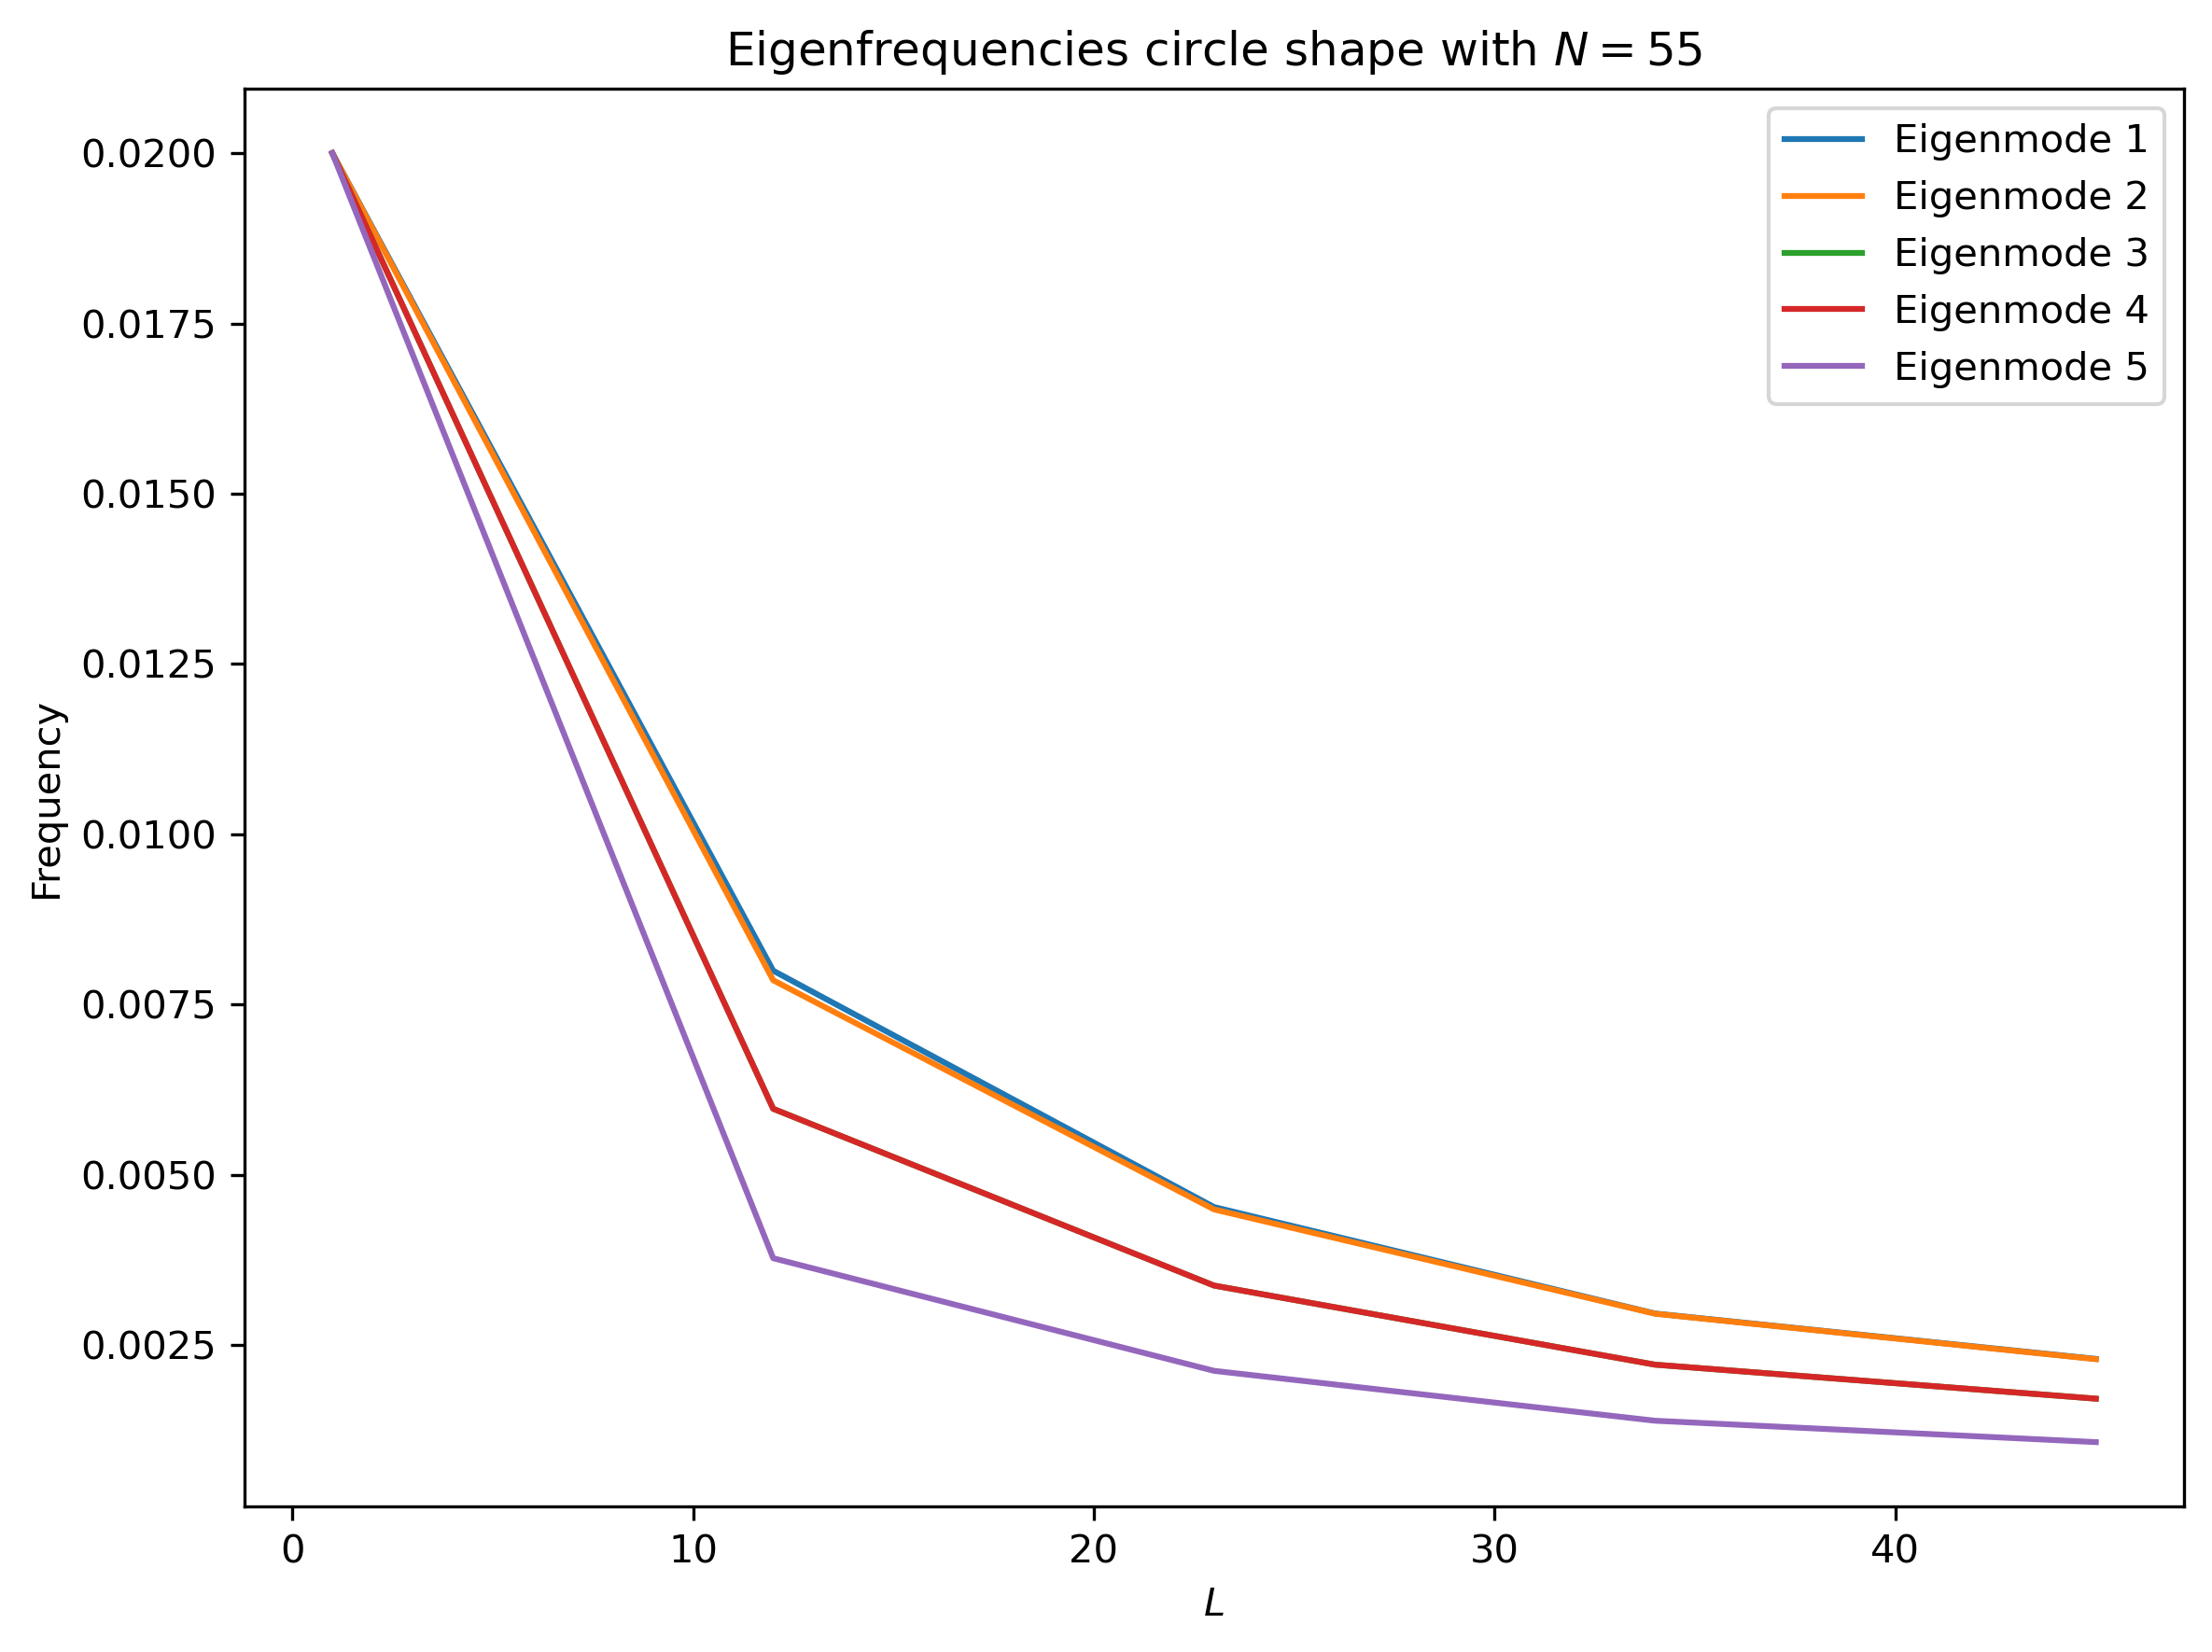

In [ ]:
plot_shape_frequency("circle")

In [ ]:
t_list = np.linspace(0, TIME_MAX, TIME_STEPS)
L = 55 
v = initialize_grid_vector(L, L, shape="square")
M = initialize_tridiagonal_matrix(vector=v, sparse=True)
M = M * dx**2
frequencies, eigenvectors = solve_eigenvalues(M, model="h")

eigenmodus = eigenvectors[:, SELECT_MODE].reshape(L, L).real
eigenmodus = normalize_eigenmodus(eigenmodus)
frequency = frequencies[SELECT_MODE]

plot_eigenmode_animation(1.0, eigenmodus, frequency, t_list, shape, delete_img=True)

Time taken to solve the eigenvalues: 0.06 seconds using sparse solver with matrix of size 3025, N=55


In [ ]:
HTML(f'<img src="results/wave.gif">')

-----
# 3.2 Direct methods for solving the steady state problems
Lorem ipsum odor amet, consectetuer adipiscing elit. Varius nullam vulputate lobortis porttitor in odio mus dictum. Tellus phasellus congue hac, tempus montes ullamcorper himenaeos. Arcu bibendum convallis lacus taciti rutrum ac dictumst mollis. Cras nullam est nostra netus nascetur iaculis hendrerit. Odio parturient purus maecenas consectetur porta hendrerit lobortis sodales. Maecenas quisque gravida sed nisi odio pellentesque habitasse. Cras tempus lacinia rhoncus conubia duis massa. Sem nibh dui mus consequat facilisi. Porta malesuada porttitor neque turpis molestie?

Consequat dictum curabitur integer suspendisse inceptos. Habitant mattis odio lorem nostra feugiat vitae vel habitasse. Scelerisque vehicula turpis eleifend, felis aptent venenatis ante fames. Tincidunt auctor quam ipsum velit ornare augue. Etiam habitant felis diam; ullamcorper netus aenean consectetur leo. Purus phasellus potenti tortor maecenas pulvinar. Auctor cras cursus hac tempor nam leo ad.

_by: [Name]_

In [ ]:
# LOCAL IMPORTS

In [ ]:
# SOME CODE

In [ ]:
# SOME CODE

-----
# 3.3 The leapfrog method - efficient time integration
Lorem ipsum odor amet, consectetuer adipiscing elit. Varius nullam vulputate lobortis porttitor in odio mus dictum. Tellus phasellus congue hac, tempus montes ullamcorper himenaeos. Arcu bibendum convallis lacus taciti rutrum ac dictumst mollis. Cras nullam est nostra netus nascetur iaculis hendrerit. Odio parturient purus maecenas consectetur porta hendrerit lobortis sodales. Maecenas quisque gravida sed nisi odio pellentesque habitasse. Cras tempus lacinia rhoncus conubia duis massa. Sem nibh dui mus consequat facilisi. Porta malesuada porttitor neque turpis molestie?

Consequat dictum curabitur integer suspendisse inceptos. Habitant mattis odio lorem nostra feugiat vitae vel habitasse. Scelerisque vehicula turpis eleifend, felis aptent venenatis ante fames. Tincidunt auctor quam ipsum velit ornare augue. Etiam habitant felis diam; ullamcorper netus aenean consectetur leo. Purus phasellus potenti tortor maecenas pulvinar. Auctor cras cursus hac tempor nam leo ad.

_by: [Name]_

In [ ]:
# LOCAL IMPORT

In [ ]:
# SOME CODE

In [ ]:
# SOME CODE